In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Pie chart

In [3]:
def pie_plot(col, title, start):
    temp = data.groupby([col])['Age'].count()
    plt.pie(temp.values, labels = temp.index, autopct='%1.f%%', startangle = start)
    plt.title(title)

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

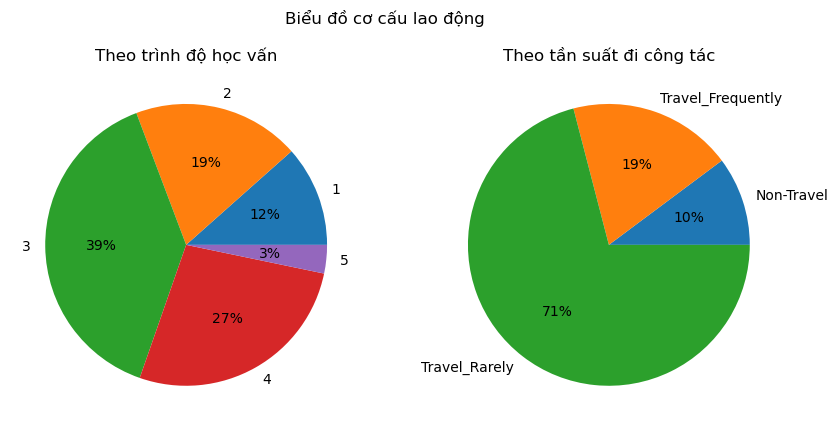

In [4]:
plt.figure(figsize = (10, 10))

plt.subplot(1,2,1)
pie_plot('Education', 'Theo trình độ học vấn', 0)

plt.subplot(1,2,2)
pie_plot('BusinessTravel', 'Theo tần suất đi công tác', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

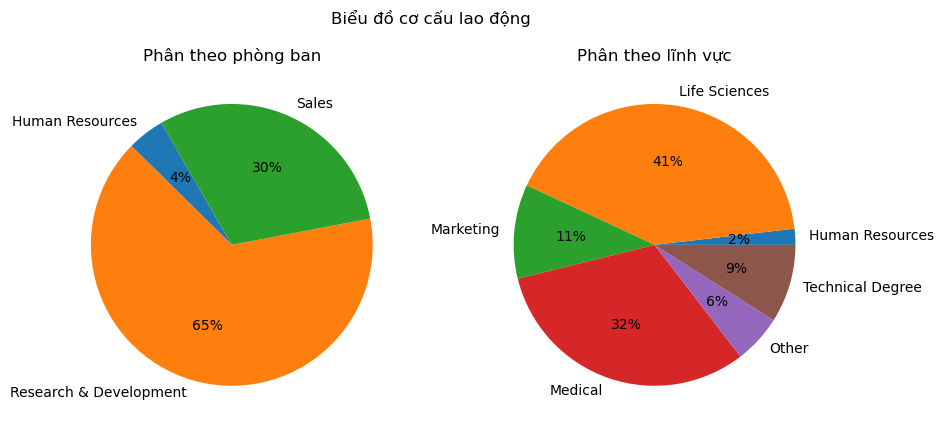

In [5]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('Department', 'Phân theo phòng ban', 120)

plt.subplot(1, 2, 2)
pie_plot('EducationField', 'Phân theo lĩnh vực', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

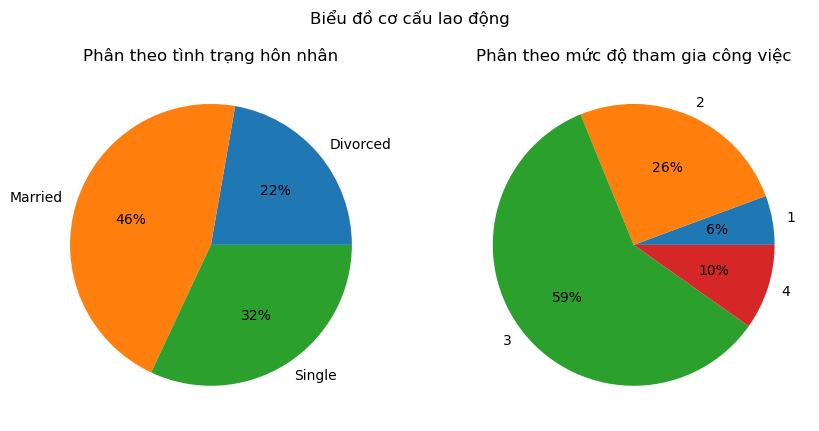

In [6]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('MaritalStatus', 'Phân theo tình trạng hôn nhân', 0)

plt.subplot(1, 2, 2)
pie_plot('JobInvolvement', 'Phân theo mức độ tham gia công việc', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

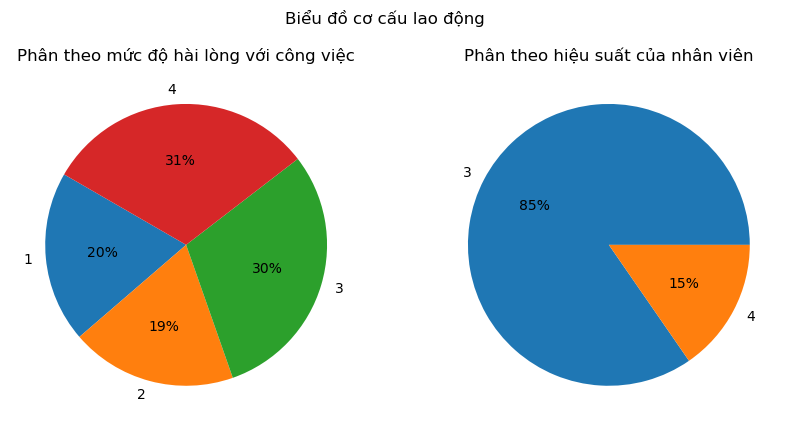

In [7]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('JobSatisfaction', 'Phân theo mức độ hài lòng với công việc', 150)

plt.subplot(1, 2, 2)
pie_plot('PerformanceRating', 'Phân theo hiệu suất của nhân viên', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

## Grouped bar chart

In [8]:
temp1 = data.groupby(['MaritalStatus', 'OverTime', 'Gender'])['Age'].count().reset_index()
temp1 = temp1[temp1['OverTime'] == 'Yes'].reset_index(drop = True)
temp = data.groupby(['MaritalStatus', 'Gender'])['Age'].count().reset_index()
temp['percent'] = temp1['Age'] / temp['Age']
temp

,MaritalStatus,Gender,Age,percent
0,Divorced,Female,117,0.367521
1,Divorced,Male,210,0.266667
2,Married,Female,272,0.272059
3,Married,Male,401,0.279302
4,Single,Female,199,0.316583
5,Single,Male,271,0.250923


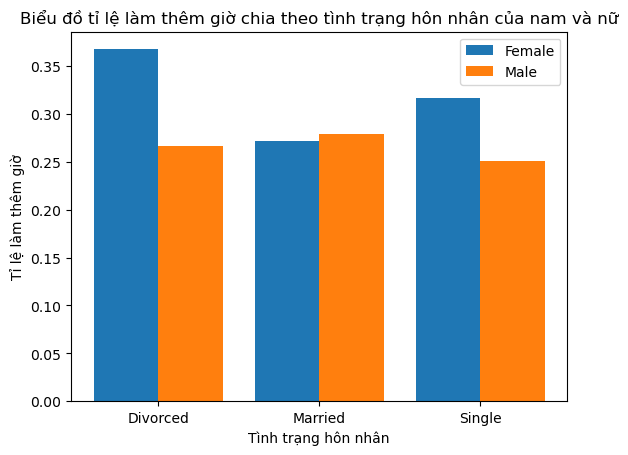

In [9]:
plt.bar(np.arange(3) - 0.2, temp[temp['Gender'] == 'Female']['percent'], 0.4, label = 'Female')
plt.bar(np.arange(3) + 0.2, temp[temp['Gender'] == 'Male']['percent'], 0.4, label = 'Male')
plt.xticks(np.arange(3), temp['MaritalStatus'].unique())
plt.legend()
plt.title("Biểu đồ tỉ lệ làm thêm giờ chia theo tình trạng hôn nhân của nam và nữ")
plt.xlabel('Tình trạng hôn nhân')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.show()

## Bar chart

Text(0.5, 1.0, 'Số lượng nhân viên chia theo vai trò trong tổ chức')

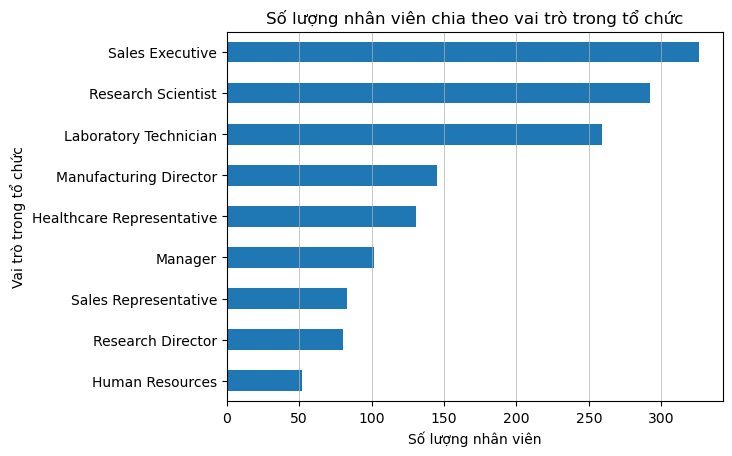

In [10]:
temp = data.groupby(['JobRole'])['Age'].count()
temp = temp.sort_values()
temp.plot(kind = 'barh')
plt.grid(axis = 'x', linewidth = 0.5)
plt.xlabel('Số lượng nhân viên')
plt.ylabel('Vai trò trong tổ chức')
plt.title("Số lượng nhân viên chia theo vai trò trong tổ chức")

## Word cloud

Text(0.5, 1.05, 'Các phòng ban có nhiều nhân viên')

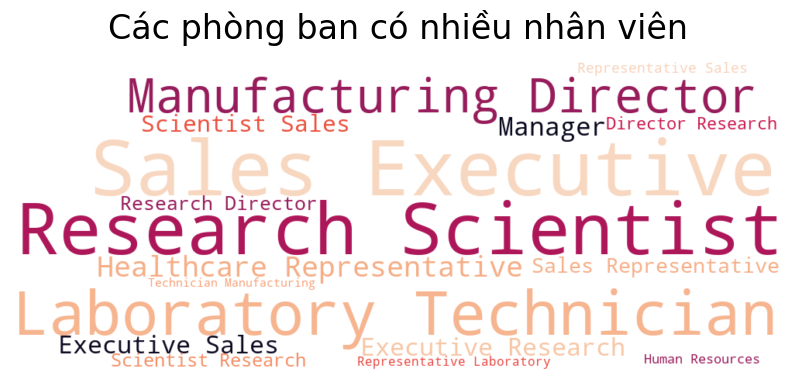

In [11]:
data['Job_Role'] = data['JobRole'].str.replace(' ', '-')
text = " ".join(i for i in data['Job_Role'].values)
wordcloud=WordCloud(width=1000,height=400,margin=1,background_color='white', colormap='rocket').generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các phòng ban có nhiều nhân viên", size = 24, y = 1.05)

Text(0.5, 1.05, 'Các lĩnh vực có nhiều nhân viên')

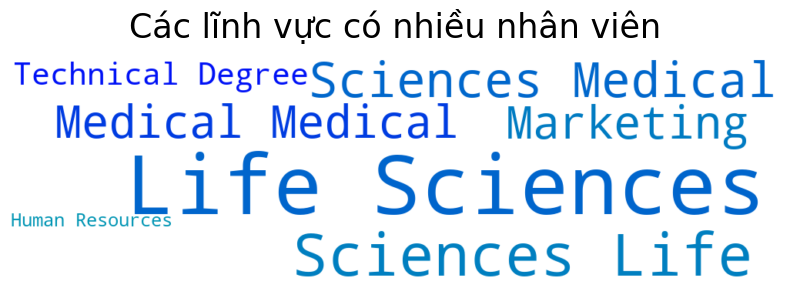

In [12]:
data['Education_Field'] = data['EducationField'].str.replace(' ', '-')
text = " ".join(i for i in data['Education_Field'].values)
wordcloud=WordCloud(width=1000,height=300,margin=1,background_color='white', colormap = 'winter').generate(text)
plt.figure(figsize = (10, 3))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các lĩnh vực có nhiều nhân viên", size = 24, y = 1.05)

## Radar chart

Để vẽ sơ đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp thì ta cần định nghĩa thế nào là cao, thế nào là thấp?

Ở đây nhóm lựa chọn mức thấp là __MonthlyIncome <= 3000 và MonthlyIncome >= 15000__ cho mức cao.

Do độ lớn của cột năm chêch lệch lớn với các cột khác nên ta sẽ chia 3 để giữ nguyên tỉ lệ chênh lệch giữa nhóm cao và thấp đồng thời cũng dễ quan sát trên biểu đồ hơn.

In [13]:
status = ['Education', 'NumCompaniesWorked', 'JobLevel', 'YearsInCurrentRole', 'YearsAtCompany']
angles = np.linspace(0,2 * np.pi, len(status), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
status.append(status[0])

In [14]:
low_salary = data[data['MonthlyIncome'] <= 3000]
low_salary = low_salary[status].mean().values
low_salary[3:5] = low_salary[3:5] / 3

In [15]:
high_salary = data[data['MonthlyIncome'] >= 15000]
high_salary = high_salary[status].mean().values
high_salary[3:5] = high_salary[3:5] / 3

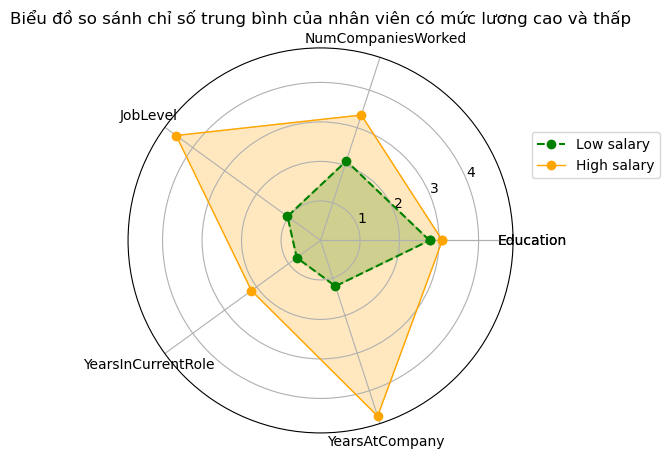

In [16]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(polar=True)

ax.plot(angles, low_salary, 'o--', color = 'g', label = 'Low salary')
ax.fill(angles, low_salary, alpha = 0.25, color = 'g')

ax.plot(angles, high_salary, 'o-', color = 'orange', linewidth = 1, label='High salary')
ax.fill(angles, high_salary, alpha = 0.25, color='orange')

ax.set_thetagrids(angles * 180 / np.pi, status)

plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Biểu đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp")
plt.show()

## Logistic Regression

### Vậy thì tỉ lệ nghỉ việc giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi

Tại đây ta sẽ encode biến Attrition với 1 là Yes nghĩa là đã nghỉ việc, 0 là No nghĩa là vẫn còn làm tại công ty.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên nghỉ việc theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.394148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448164
         Iterations 6


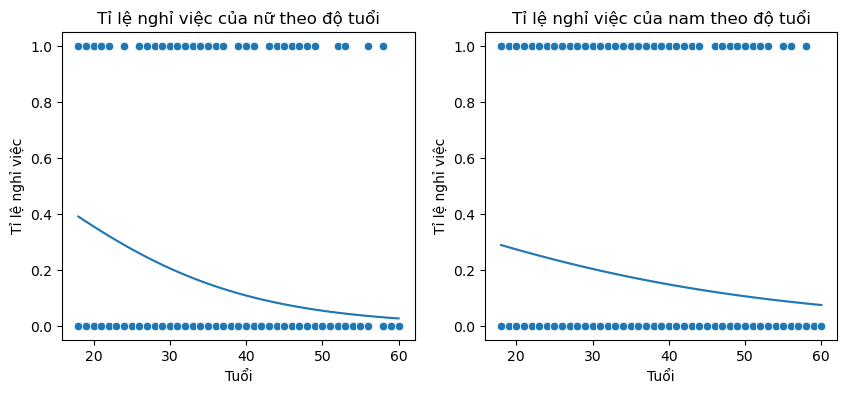

In [17]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nam theo độ tuổi")
plt.show()

In [18]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  0.914 - 0.076 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -0.208 - 0.039 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Giống nhau: ở độ tuổi càng nhỏ thì tỉ lệ nhảy việc càng cao và càng lớn tuổi thì khả năng gắn bó với công ty càng cao.
- Khác nhau: Khi còn trẻ nữ sẽ nhảy việc nhiều hơn nam nhưng đồng thời cũng sẽ tìm được công ty phù hợp với mình nhanh hơn như hình trên thì độ dốc của biểu đồ bên nữ cao hơn bên nam.

### Thực hiện tương tự cho tỉ lệ làm thêm giờ giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi

Tại đây ta sẽ encode biến Overtime với 1 là Yes nghĩa là làm thêm giờ, 0 là No nghĩa là không làm thêm giờ.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên làm thêm giờ theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.615736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579007
         Iterations 5


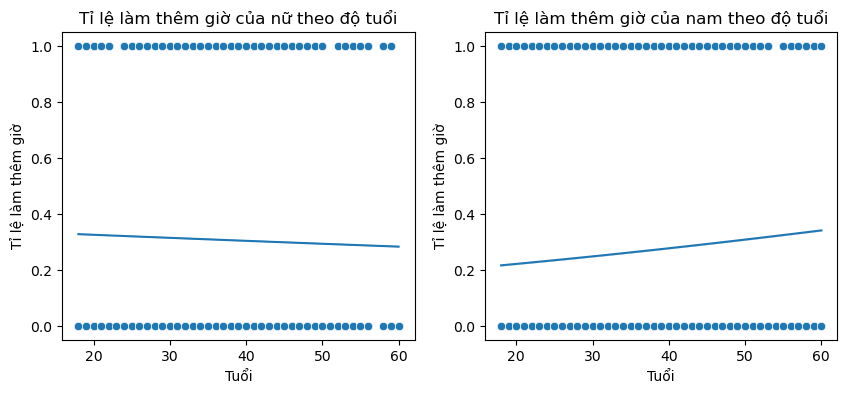

In [19]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nam theo độ tuổi")
plt.show()

In [20]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  -0.632 - 0.005 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -1.561 - -0.015 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Thời gian đầu nữ làm thêm giờ rất nhiều nhưng về sau lại giảm, còn nam thi càng lớn tuổi thì tỉ lệ làm thêm giờ càng cao. Điều này có thể giải thích bằng việc sau khi kết hôn, phụ nữ sẽ phải dành nhiều thời gian hơn cho gia đình và con cái còn đàn ông thì phải phụ trách chính trong kinh tế.